In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [3]:
# some global viewing options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
# load in csv
df = pd.read_csv('./data.csv')
df

,age,Race_WhiteAfricanAmericanAsianHispanicLatinoOther,Ht,Wgt,BMI,BPadmit,RRadmit,HRadmit,tempadmit,O2admit,MF,Admitdxc19,Admitdxflu,AdmitdxPNA,Fever,myalgias,fatigue,HA,Rhino,ST,SOB,Chest,Cough,Sputum,Hemopt,OnsetDays,NV,diarrhea,Num_COVID_Symptoms,NIDDM,IDDM,OSA,AnyLungdisease,COPD,Asthma,RecentLungInfection,ActiveLungCancer,LungCancerRemission,HistoryofSmokingorVaping,CurrentSmokerorVaper,Tobacco,Marijuana,Vape,Healthcareworker,HCTypeMDDO,HCTypeRNCRNP,HCworkerOther,HCworkerOtherType,Immuno,LongTermSteroid,EtOH,Afib,CHF,CAD,CKD,Ondialysis,Anytransplant,GERD,HTN,Num_Other_Risk_Factor,WBC,Lympho,Hg,Plts,ALT,AST,Ddimer,LDH,CRP_Max_19k,Ferrit,Troponin,Troponinlt.06,Troponin.0612,Troponingt2.1,PosBloodCulture,ChestCTComplete,GroundglassCTchest,Low02D1,AvgMaxTemp,LOS,ARDS,Cardiomyopathy,Hydroxychloraquine,Death_ICU,Died
0,76,White,62.01,174.00,31.94,116/80,22,90,99.2,95.000000,f,1,0,1,0,1,1,1,0,0,1,1,1,0,0,6,0,1,7,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,4,1.53,0.54,11.30,115.0,117,153,1.36,374.0,18.800,836.00,1,1,0,0,0,1,1,85,100.66,22,1,0,1,1,0
1,72,White,65.00,110.00,18.31,184/69,28,107,101.6,84.000000,f,0,0,0,1,0,1,0,0,0,1,1,1,0,0,4,0,0,4,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,6,10.69,1.32,9.60,384.0,95,112,1.79,379.1,9.760,317.10,1,0,0,1,0,1,1,95,100.60,23,1,0,0,0,0
2,62,African American,70.00,240.00,34.40,120/74,26,101,100.7,93.000000,m,1,0,1,1,1,1,0,0,0,1,1,1,0,0,7,1,1,7,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,4,4.91,0.58,12.30,176.0,49,59,0.68,375.0,4.600,793.00,1,1,0,0,0,0,1,94,100.73,13,1,0,1,0,0
3,70,African American,72.99,213.00,28.10,171/82,24,88,102.0,94.000000,m,0,0,1,1,1,1,0,0,0,1,1,1,0,0,7,0,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.22,0.40,12.70,167.0,299,296,1.20,726.0,17.000,10190.00,1,1,0,0,0,1,1,87,100.09,12,0,0,1,0,0
4,49,Hispanic/Latino,66.00,316.00,50.87,141/71,20,97,99.4,96.000000,f,1,0,0,0,0,1,0,0,0,1,0,1,0,0,3,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,6.22,0.95,12.50,188.0,101,119,0.62,381.0,7.820,348.00,0,0,0,0,1,1,0,96,98.81,23,1,0,1,1,0
5,69,White,72.01,209.00,28.30,140/78,26,88,99.0,87.000000,m,0,0,1,0,0,1,0,0,0,1,0,1,0,0,4,0,0,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,6,14.07,0.60,10.10,221.0,52,128,5.41,798.0,11.400,715.00,1,0,1,0,0,1,1,78,99.05,3,1,1,0,1,1
6,70,Hispanic/Latino,63.00,194.00,34.48,127/65,24,76,99.4,93.000000,m,1,0,0,0,0,0,0,0,0,1,0,1,0,0,10,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,5.51,1.32,15.20,144.0,34,24,0.41,246.0,4.590,228.00,1,1,0,0,0,1,1,92,100.36,24,1,0,0,1,0
7,74,White,64.00,152.00,26.10,172/71,23,106,99.1,94.000000,f,1,0,0,0,0,0,0,0,0,1,0,0,0,0,3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,3,9.89,0.88,9.70,241.0,29,93,1.44,444.0,9.760,642.00,1,1,0,0,1,1,0,87,98.10,2,0,1,0,1,1
8,76,White,72.00,226.00,29.00,107/64,19,73,97.5,96.000000,m,1,0,0,0,0,0,0,0,0,1,1,1,0,0,2,0,0,3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,6,3.63,0.90,11.90,221.0,32,32,0.54,410.0,12.400,403.00,1,1,1,0,1,1,0,93,98.56,20,1,0,0,1,1
9,81,White,66.00,246.00,42.90,154/39,24,70,99.6,96.000000,f,1,0,0,1,0,0,0,0,0,0,0,1,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3.92,1.02,11.70,167.0,16,23,0.52,222.0,3.360,60.00,1,1,0,0,1,1,0,95,98.45,5,0,0,0,0,0


In [5]:
# one-hot races
df = pd.get_dummies(df, prefix = ['Race'], columns = ['Race_WhiteAfricanAmericanAsianHispanicLatinoOther'])

In [6]:
# separate heart rates
bp = df["BPadmit"].str.split("/", n = 1, expand = True) 
df['Systolic'] = bp[0]
df['Diastolic'] = bp[1]
df = df.drop('BPadmit', 'columns')

In [7]:
# one-hot sexes
df = pd.get_dummies(df, prefix = ['Sex'], columns = ['MF'])

In [8]:
# rearranging columns
sys = df.pop('Systolic')
dia = df.pop('Diastolic')

df.insert(6, 'Systolic', sys)
df.insert(7, 'Diastolic', dia)

In [9]:
curr = df.pop('Race_White')
df.insert(11, 'Race_White', curr)

curr = df.pop('Race_Unknown')
df.insert(11, 'Race_Unknown', curr)

curr = df.pop('Race_Other')
df.insert(11, 'Race_Other', curr)

curr = df.pop('Race_Hispanic/Latino')
df.insert(11, 'Race_Hispanic/Latino', curr)

curr = df.pop('Race_Asian')
df.insert(11, 'Race_Asian', curr)

curr = df.pop('Race_African American')
df.insert(11, 'Race_African American', curr)

In [10]:
curr = df.pop('Sex_f')
df.insert(11, 'Sex_f', curr)

curr = df.pop('Sex_m')
df.insert(11, 'Sex_m', curr)

df

,age,Ht,Wgt,BMI,RRadmit,HRadmit,Systolic,Diastolic,tempadmit,O2admit,Admitdxc19,Sex_m,Sex_f,Race_African American,Race_Asian,Race_Hispanic/Latino,Race_Other,Race_Unknown,Race_White,Admitdxflu,AdmitdxPNA,Fever,myalgias,fatigue,HA,Rhino,ST,SOB,Chest,Cough,Sputum,Hemopt,OnsetDays,NV,diarrhea,Num_COVID_Symptoms,NIDDM,IDDM,OSA,AnyLungdisease,COPD,Asthma,RecentLungInfection,ActiveLungCancer,LungCancerRemission,HistoryofSmokingorVaping,CurrentSmokerorVaper,Tobacco,Marijuana,Vape,Healthcareworker,HCTypeMDDO,HCTypeRNCRNP,HCworkerOther,HCworkerOtherType,Immuno,LongTermSteroid,EtOH,Afib,CHF,CAD,CKD,Ondialysis,Anytransplant,GERD,HTN,Num_Other_Risk_Factor,WBC,Lympho,Hg,Plts,ALT,AST,Ddimer,LDH,CRP_Max_19k,Ferrit,Troponin,Troponinlt.06,Troponin.0612,Troponingt2.1,PosBloodCulture,ChestCTComplete,GroundglassCTchest,Low02D1,AvgMaxTemp,LOS,ARDS,Cardiomyopathy,Hydroxychloraquine,Death_ICU,Died
0,76,62.01,174.00,31.94,22,90,116,80,99.2,95.000000,1,0,1,0,0,0,0,0,1,0,1,0,1,1,1,0,0,1,1,1,0,0,6,0,1,7,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,4,1.53,0.54,11.30,115.0,117,153,1.36,374.0,18.800,836.00,1,1,0,0,0,1,1,85,100.66,22,1,0,1,1,0
1,72,65.00,110.00,18.31,28,107,184,69,101.6,84.000000,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,1,0,0,4,0,0,4,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,6,10.69,1.32,9.60,384.0,95,112,1.79,379.1,9.760,317.10,1,0,0,1,0,1,1,95,100.60,23,1,0,0,0,0
2,62,70.00,240.00,34.40,26,101,120,74,100.7,93.000000,1,1,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,1,0,0,7,1,1,7,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,4,4.91,0.58,12.30,176.0,49,59,0.68,375.0,4.600,793.00,1,1,0,0,0,0,1,94,100.73,13,1,0,1,0,0
3,70,72.99,213.00,28.10,24,88,171,82,102.0,94.000000,0,1,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,1,0,0,7,0,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.22,0.40,12.70,167.0,299,296,1.20,726.0,17.000,10190.00,1,1,0,0,0,1,1,87,100.09,12,0,0,1,0,0
4,49,66.00,316.00,50.87,20,97,141,71,99.4,96.000000,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,3,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,6.22,0.95,12.50,188.0,101,119,0.62,381.0,7.820,348.00,0,0,0,0,1,1,0,96,98.81,23,1,0,1,1,0
5,69,72.01,209.00,28.30,26,88,140,78,99.0,87.000000,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,4,0,0,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,6,14.07,0.60,10.10,221.0,52,128,5.41,798.0,11.400,715.00,1,0,1,0,0,1,1,78,99.05,3,1,1,0,1,1
6,70,63.00,194.00,34.48,24,76,127,65,99.4,93.000000,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,10,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,5.51,1.32,15.20,144.0,34,24,0.41,246.0,4.590,228.00,1,1,0,0,0,1,1,92,100.36,24,1,0,0,1,0
7,74,64.00,152.00,26.10,23,106,172,71,99.1,94.000000,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,3,9.89,0.88,9.70,241.0,29,93,1.44,444.0,9.760,642.00,1,1,0,0,1,1,0,87,98.10,2,0,1,0,1,1
8,76,72.00,226.00,29.00,19,73,107,64,97.5,96.000000,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,2,0,0,3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,6,3.63,0.90,11.90,221.0,32,32,0.54,410.0,12.400,403.00,1,1,1,0,1,1,0,93,98.56,20,1,0,0,1,1
9,81,66.00,246.00,42.90,24,70,154,39,99.6,96.000000,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3.92,1.02,11.70,167.0,16,23,0.52,222.0,3.360,60.00,1,1,0,0,1,1,0,95,98.45,5,0,0,0,0,0


In [11]:
# change column types
df["Systolic"] = df["Systolic"].astype(str).astype(int)
df["Diastolic"] = df["Diastolic"].astype(str).astype(int)
df["Ferrit"] = df["Ferrit"].astype(str).astype(float)

<AxesSubplot:>

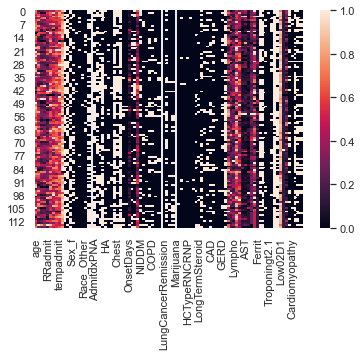

In [12]:
sns.heatmap((df-df.min())/(df.max()-df.min()))

In [13]:
# standardization
standard = (df-df.min())/(df.max()-df.min())
corr = standard.corr()

In [14]:
standard

,age,Ht,Wgt,BMI,RRadmit,HRadmit,Systolic,Diastolic,tempadmit,O2admit,Admitdxc19,Sex_m,Sex_f,Race_African American,Race_Asian,Race_Hispanic/Latino,Race_Other,Race_Unknown,Race_White,Admitdxflu,AdmitdxPNA,Fever,myalgias,fatigue,HA,Rhino,ST,SOB,Chest,Cough,Sputum,Hemopt,OnsetDays,NV,diarrhea,Num_COVID_Symptoms,NIDDM,IDDM,OSA,AnyLungdisease,COPD,Asthma,RecentLungInfection,ActiveLungCancer,LungCancerRemission,HistoryofSmokingorVaping,CurrentSmokerorVaper,Tobacco,Marijuana,Vape,Healthcareworker,HCTypeMDDO,HCTypeRNCRNP,HCworkerOther,HCworkerOtherType,Immuno,LongTermSteroid,EtOH,Afib,CHF,CAD,CKD,Ondialysis,Anytransplant,GERD,HTN,Num_Other_Risk_Factor,WBC,Lympho,Hg,Plts,ALT,AST,Ddimer,LDH,CRP_Max_19k,Ferrit,Troponin,Troponinlt.06,Troponin.0612,Troponingt2.1,PosBloodCulture,ChestCTComplete,GroundglassCTchest,Low02D1,AvgMaxTemp,LOS,ARDS,Cardiomyopathy,Hydroxychloraquine,Death_ICU,Died
0,0.708333,0.211468,0.233300,0.335406,0.357143,0.519231,0.377953,0.623656,0.607843,0.864865,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.084746,0.0,1.0,0.636364,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.444444,0.000000,0.128947,0.463918,0.217557,0.315942,0.468013,0.052364,0.277538,0.989332,0.081919,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.732143,0.153058,0.456522,1.0,0.0,1.0,1.0,0.0
1,0.652778,0.368753,0.045297,0.052861,0.571429,0.682692,0.913386,0.505376,0.843137,0.567568,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.050847,0.0,0.0,0.363636,1.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.666667,0.416742,0.334211,0.288660,0.787956,0.252174,0.329966,0.074225,0.281329,0.507121,0.030989,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.910714,0.152228,0.478261,1.0,0.0,0.0,0.0,0.0
2,0.513889,0.631773,0.427178,0.386401,0.500000,0.625000,0.409449,0.559140,0.754902,0.810811,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.101695,1.0,1.0,0.636364,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.444444,0.153776,0.139474,0.567010,0.346904,0.118841,0.151515,0.017794,0.278282,0.231877,0.077698,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.892857,0.154027,0.260870,1.0,0.0,1.0,0.0,0.0
3,0.625000,0.789058,0.347864,0.255804,0.428571,0.500000,0.811024,0.645161,0.882353,0.837838,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.101695,0.0,1.0,0.545455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.486351,0.092105,0.608247,0.327820,0.843478,0.949495,0.044230,0.539171,0.893316,1.000000,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.767857,0.145170,0.239130,0.0,0.0,1.0,0.0,0.0
4,0.333333,0.421357,0.650432,0.727819,0.285714,0.586538,0.574803,0.526882,0.627451,0.891892,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.033898,0.0,0.0,0.272727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.213376,0.236842,0.587629,0.372349,0.269565,0.353535,0.014743,0.282741,0.403638,0.034022,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.928571,0.127456,0.478261,1.0,0.0,1.0,1.0,0.0
5,0.611111,0.737507,0.336114,0.259950,0.500000,0.500000,0.566929,0.602151,0.588235,0.648649,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.050847,0.0,0.0,0.272727,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.666667,0.570519,0.144737,0.340206,0.442324,0.127536,0.383838,0.258261,0.592686,0.594602,0.070043,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.607143,0.130778,0.043478,1.0,1.0,0.0,1.0,1.0
6,0.625000,0.263546,0.292051,0.388060,0.428571,0.384615,0.464567,0.462366,0.627451,0.810811,1.0,1.0,0.0,0.0,0.0,1

<AxesSubplot:>

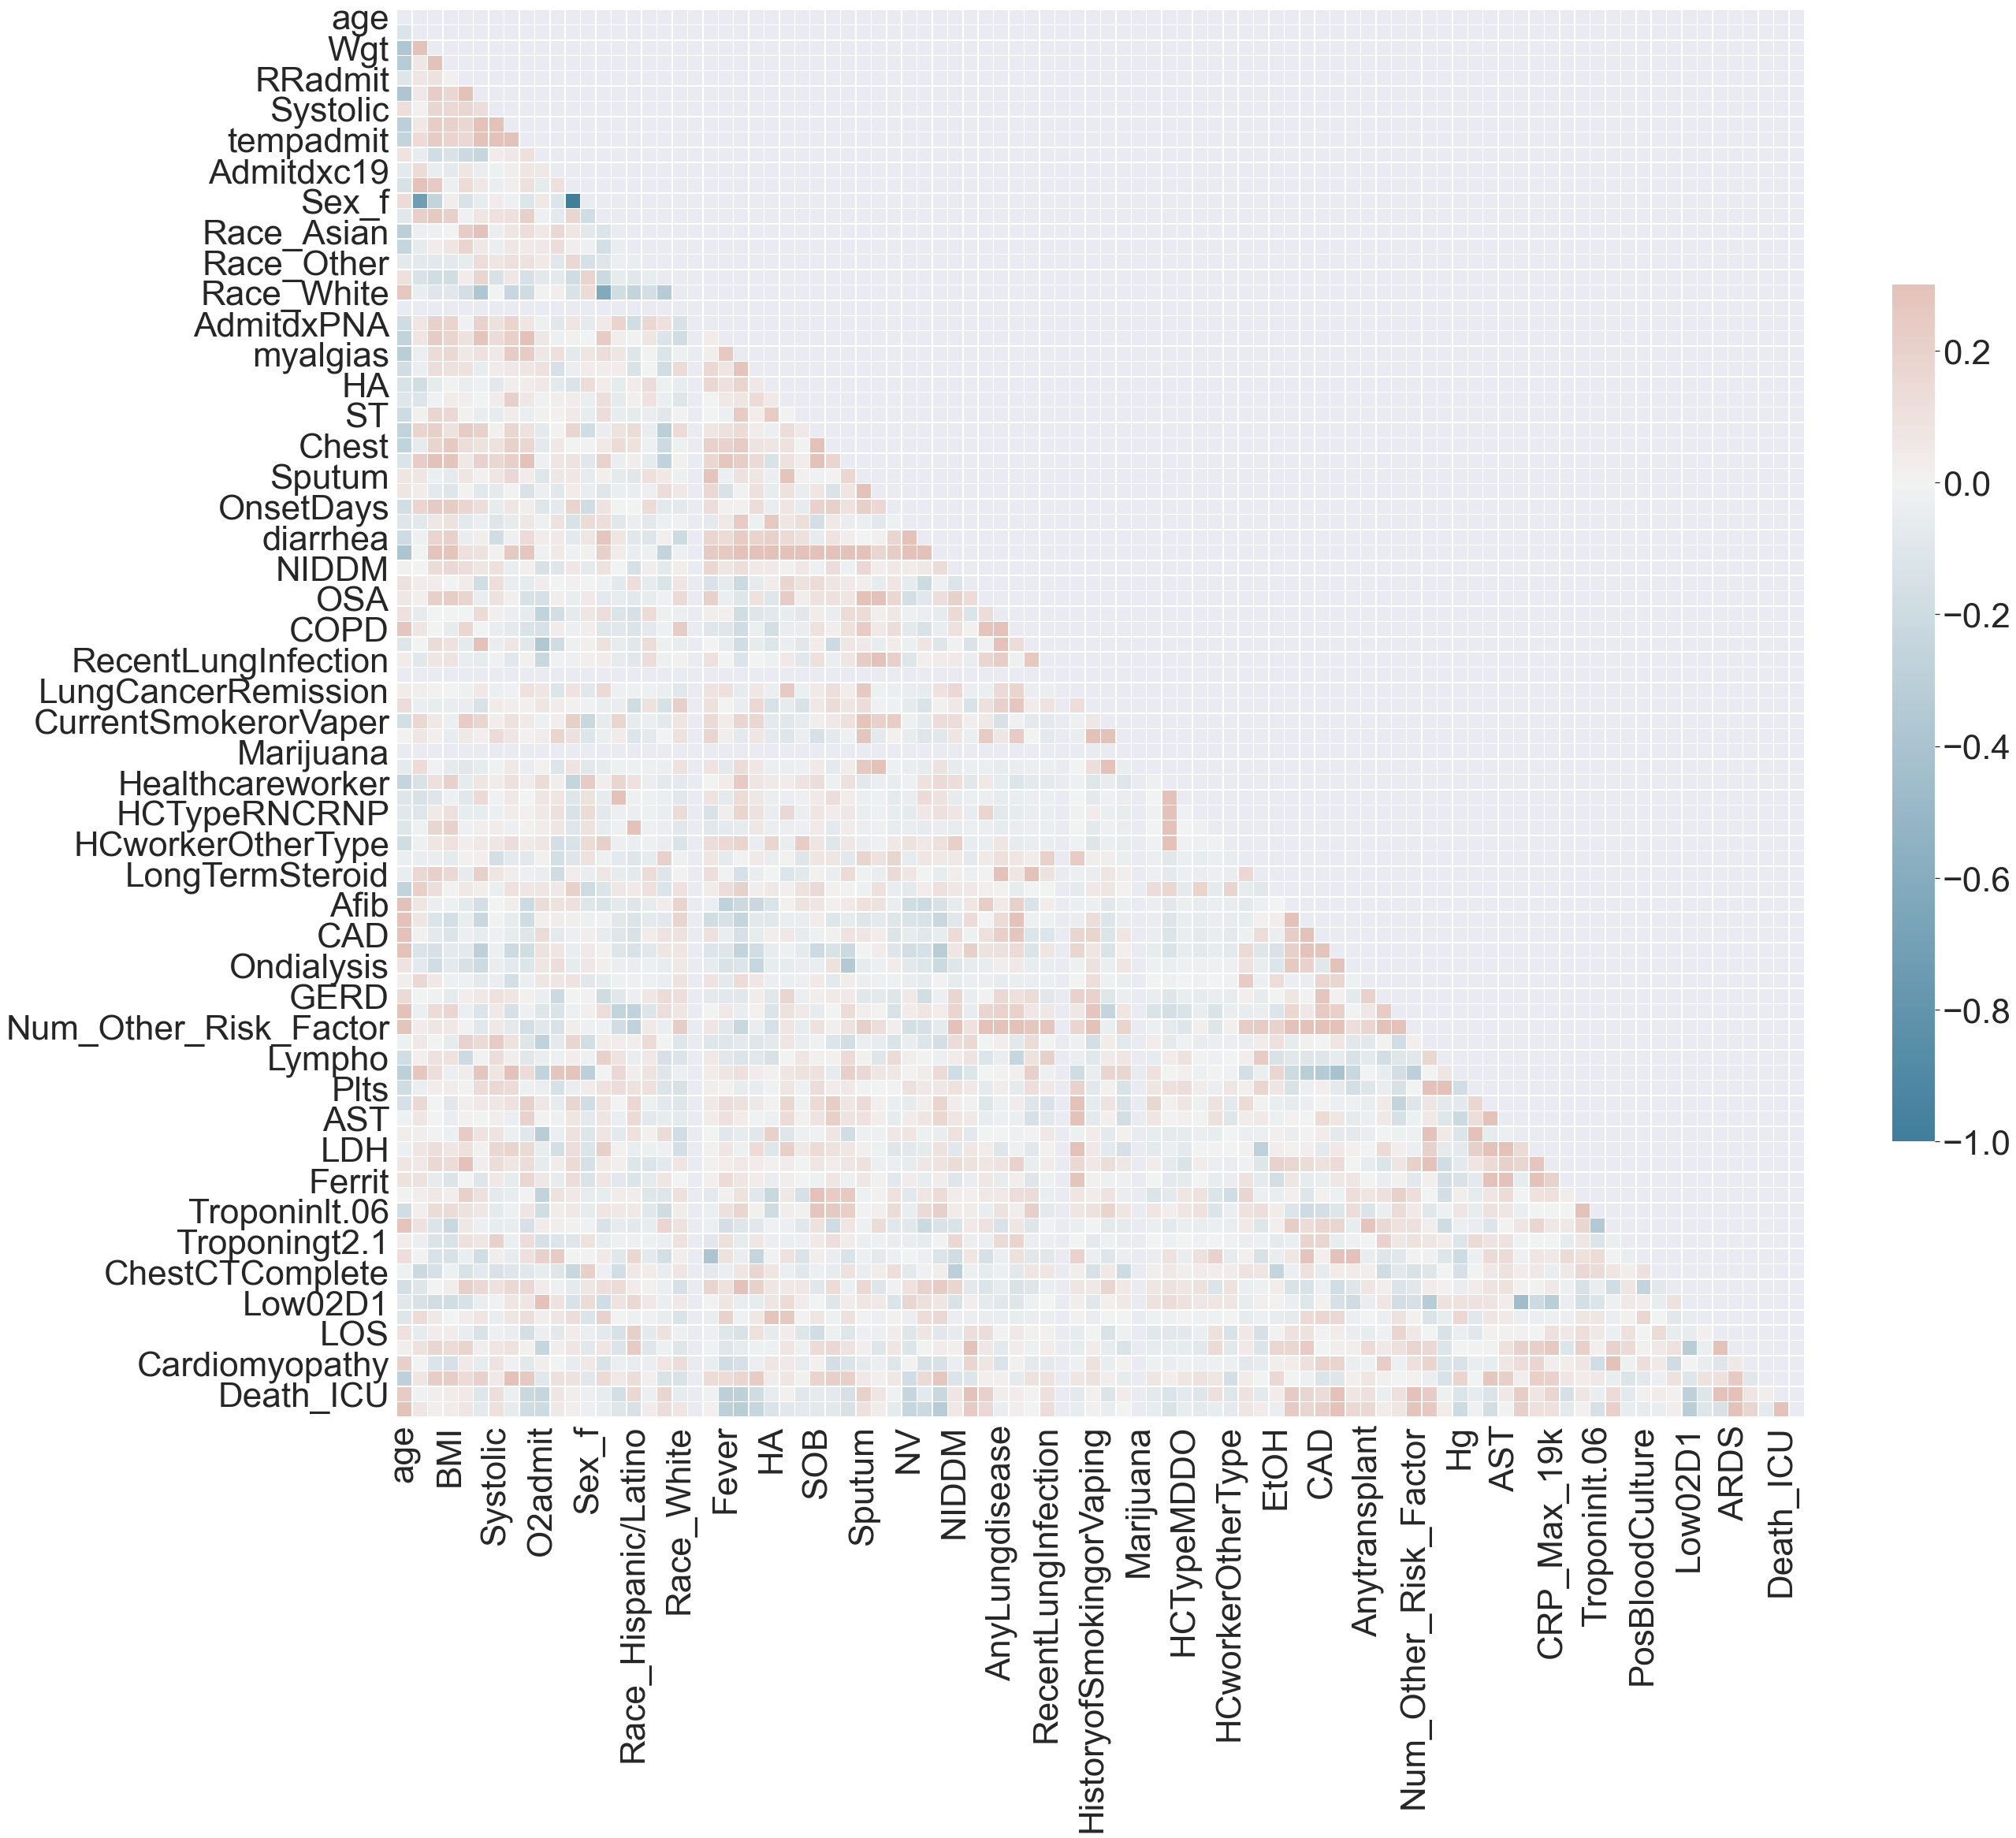

In [31]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 40))

plt.rc('xtick', labelsize=20)
# plt.rc('ytick', labelsize=20) 

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.set(font_scale=4)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [16]:
# what's most correlated with death/icu
corr.iloc[-2].sort_values()

Fever                      -0.293265
myalgias                   -0.288067
Low02D1                    -0.288001
NV                         -0.242214
O2admit                    -0.236533
Num_COVID_Symptoms         -0.228122
tempadmit                  -0.227629
fatigue                    -0.196760
Race_Asian                 -0.158777
Ferrit                     -0.153109
Cough                      -0.150482
Hg                         -0.126060
ALT                        -0.120950
CurrentSmokerorVaper       -0.117188
Healthcareworker           -0.117188
HCworkerOtherType          -0.111283
HCTypeRNCRNP               -0.111283
AvgMaxTemp                 -0.101727
HRadmit                    -0.097927
ST                         -0.090513
Chest                      -0.079611
Troponingt2.1              -0.078346
HCTypeMDDO                 -0.078346
LungCancerRemission        -0.078346
Vape                       -0.078346
diarrhea                   -0.071755
LongTermSteroid            -0.070965
S

## The Action Plan

1. Chi-Squared Test for categorical stuff - maybe better than just correlation for numerical/continuous values

[chisquared stackexchange](https://datascience.stackexchange.com/questions/893/how-to-get-correlation-between-two-categorical-variable-and-a-categorical-variab)

[wiki](https://en.wikipedia.org/wiki/Chi-squared_test)

[sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html)

[more sklearn](https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html?highlight=chi%20square)

2. PCA? doesn't tell us anything about feature selections because it combines stuff and makes it uninterpretable (not for feature selection) - maybe just with numerical values and drop categorical data
3. do correlation just with numerical data
4. Ask Vidisha about healthcare data (datasets???)
5. maybe GMM (latent data that probably came from 2 classes, allows us to look at discrepancies between classes) (or bernoulli mixture models for categoricals and compare with known gaussians), kmeans 
6. Pairplots between numericals (see if we can find any clusters visually)

for the future supervised part - Naive Bayes (posteriors of having a severe case)
[bernoulli naive bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html)

In [209]:
df.iloc[:,df.columns.get_loc('Num_COVID_Symptoms')].max()

11

In [210]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

In [211]:
barData = df.loc[:, 'Admitdxc19':'HTN'].join(df.loc[:, 'Troponin':'GroundglassCTchest']).join(df.loc[:, 'ARDS':'Sex_m'])

In [212]:
barData = barData.drop(labels=['OnsetDays', 'Num_COVID_Symptoms'], axis ='columns')

In [213]:
barData = barData.sum(0)
barData

Admitdxc19                70
Sex_m                     61
Sex_f                     55
Race_African American     33
Race_Asian                 4
                        ... 
Troponin.0612             11
Troponingt2.1              1
PosBloodCulture           21
ChestCTComplete          110
GroundglassCTchest        74
Length: 61, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='Occurrences'>

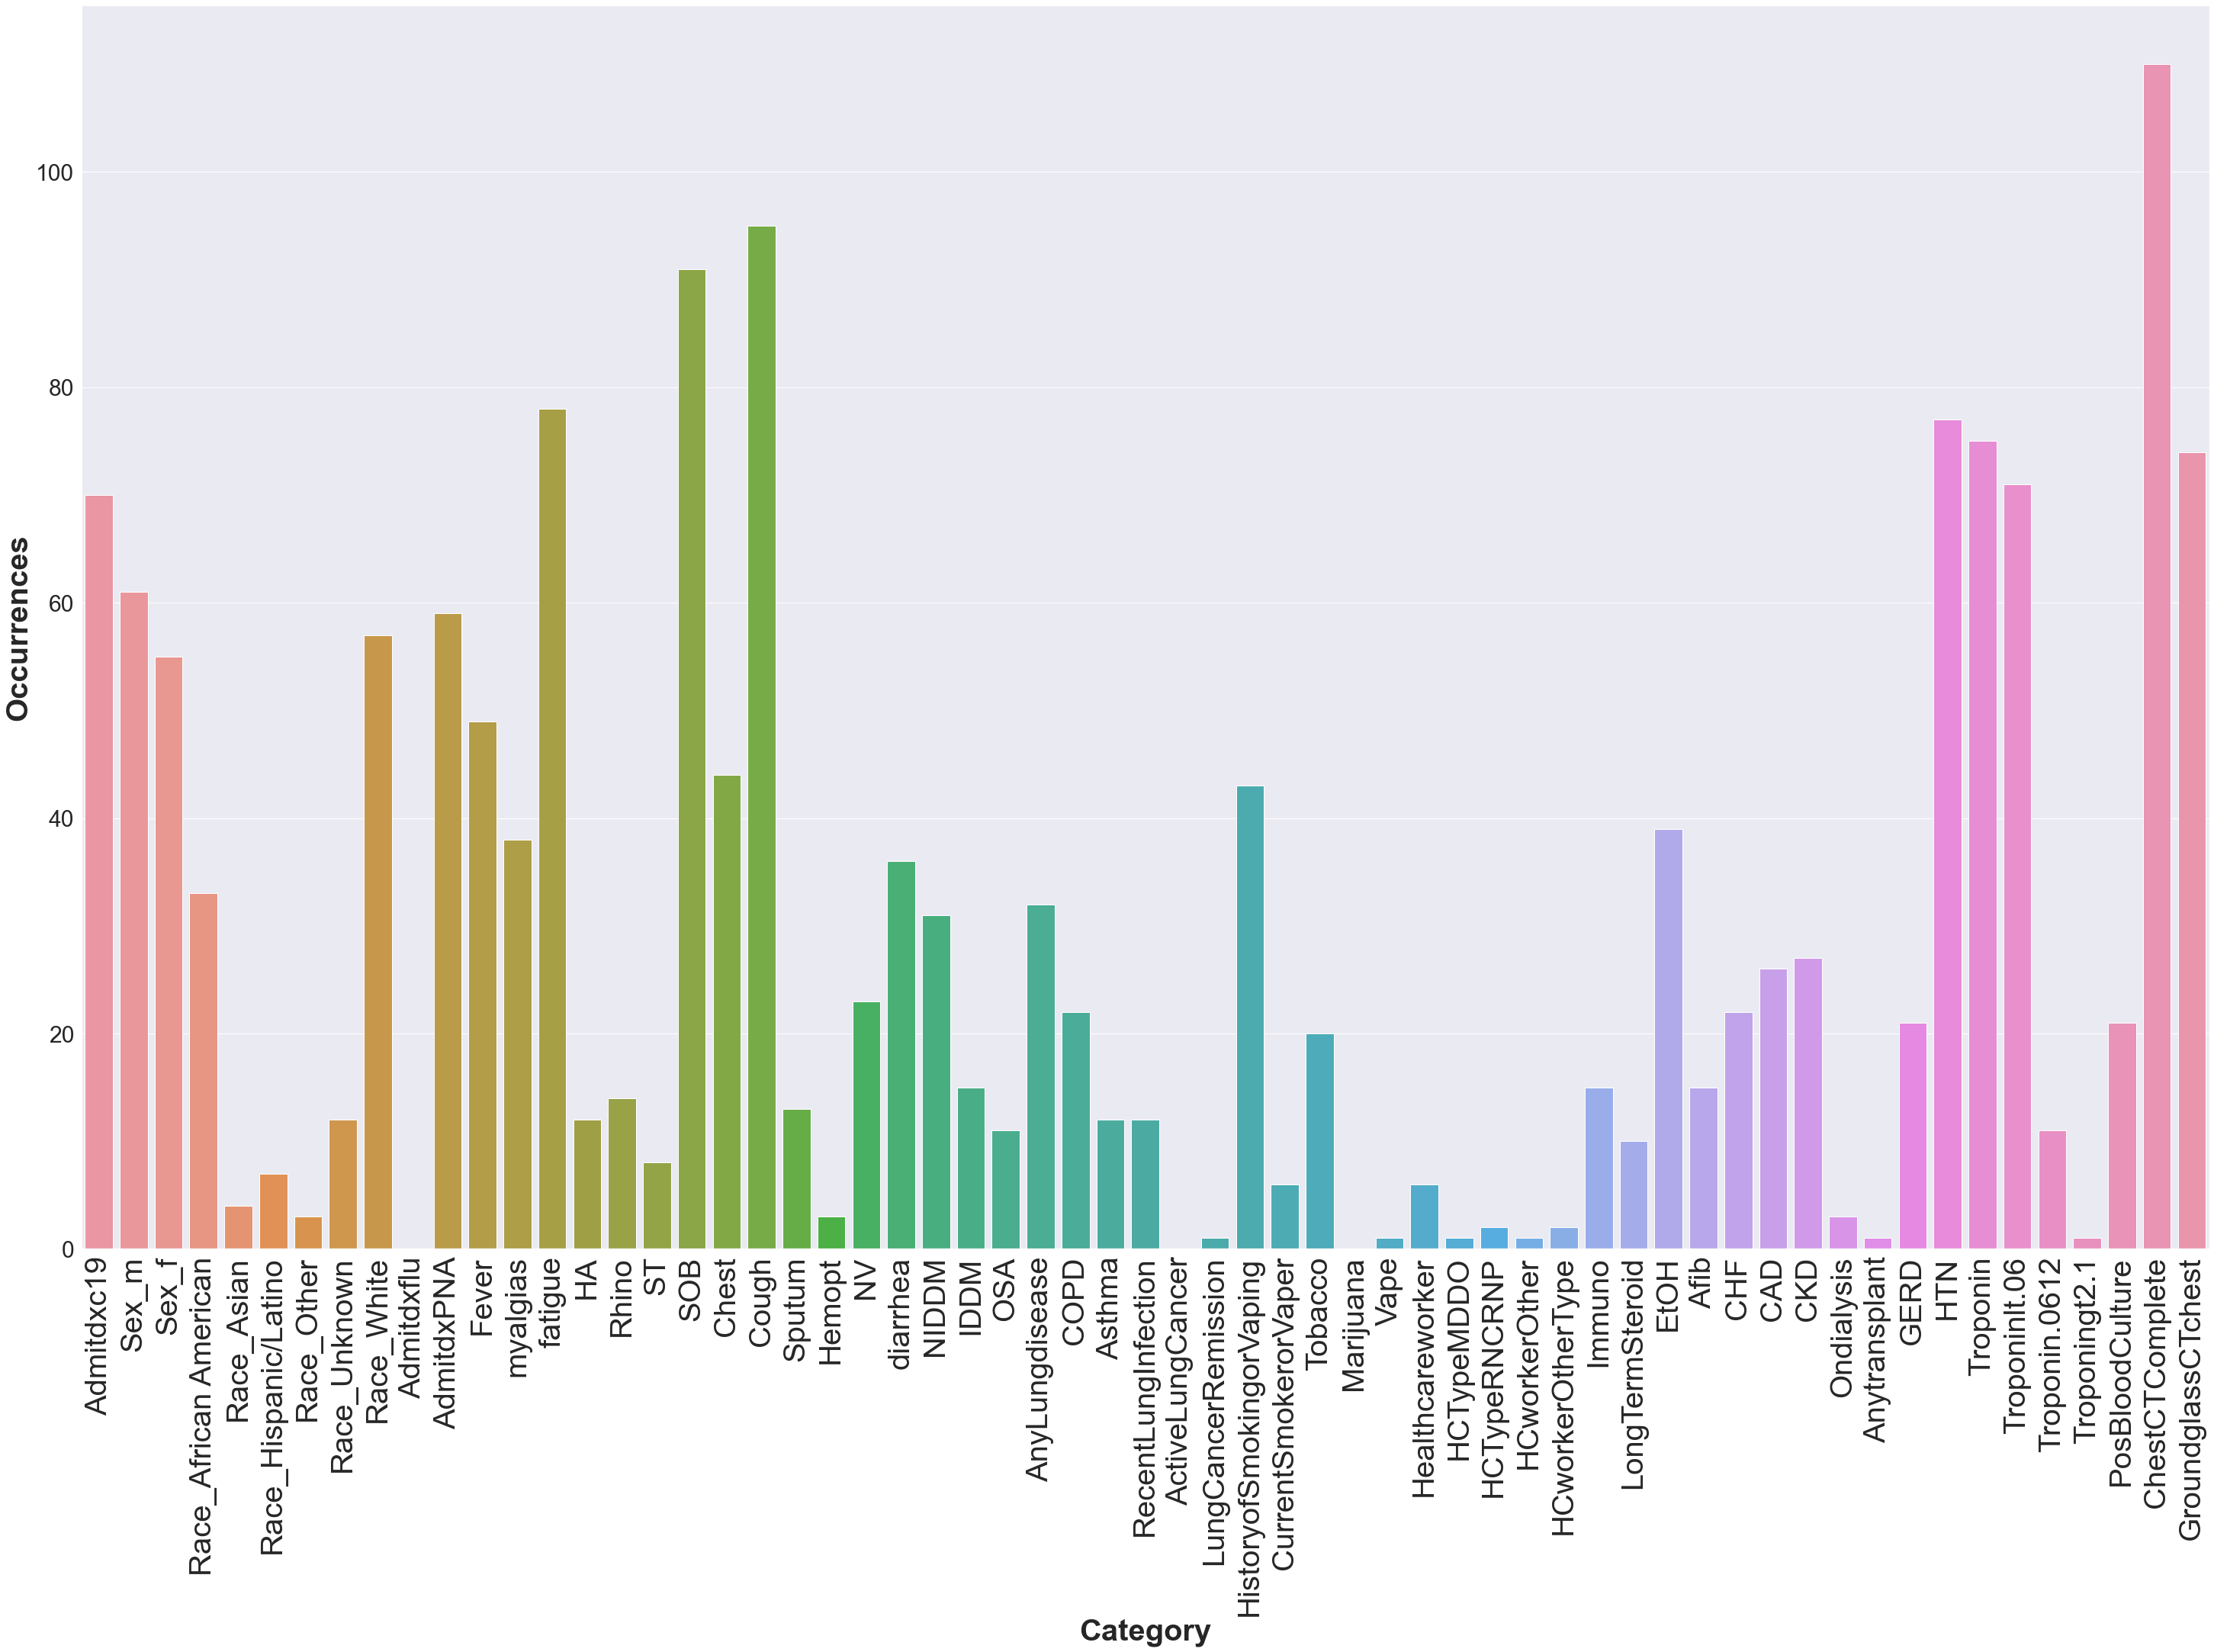

In [214]:
fig_dims = (50, 30)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation = 90)
plt.xlabel("Category", size = 40, weight = 'bold')
plt.ylabel("Occurrences", size = 40, weight = 'bold')
plt.xticks(size = 40)
plt.yticks(size = 30)

sns.barplot(x = barData.index, y = barData, ax=ax)